<a href="https://colab.research.google.com/github/AndresMontesDeOca/TimeSeries/blob/main/Unidad_1/AST_Clase_1_ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 1</h3>
    <h5>Ejercicio 2</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

In [14]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

In [15]:
rcParams['figure.figsize']= 14, 5
rcParams['axes.spines.top']= False
rcParams['axes.spines.right']= False
rcParams['axes.prop_cycle']= cycler(color=['#101010'])
rcParams['lines.linewidth']= 2

In [16]:
from IPython import display
display.set_matplotlib_formats("svg")

<ipython-input-16-c9c29f7cee36>:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


**RUIDO BLANCO**

In [17]:
ruido_blanco = np.random.randn(1000)

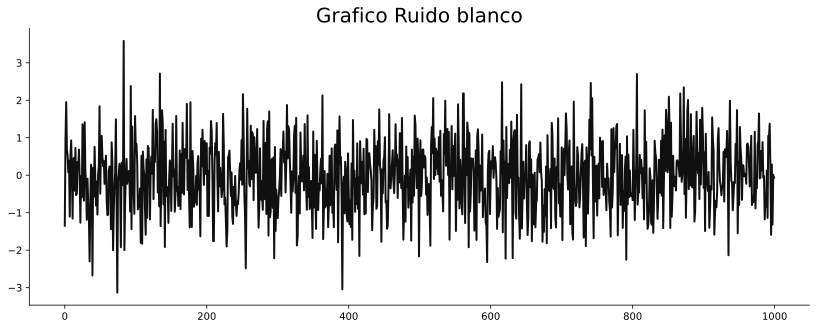

In [18]:
plt.title("Grafico Ruido blanco", size=20)
plt.plot(np.arange(len(ruido_blanco)),ruido_blanco)

*COMENTARIO NUEVO 1*

Aqui vemos el ploteo de una serie simulada como ruido blanco. La grafica muestra similitudes con respecto al ejercicio 1, cuando se grafico la primera diferencia de la serie original.
¿ se llegan a ver las simulitudes ?

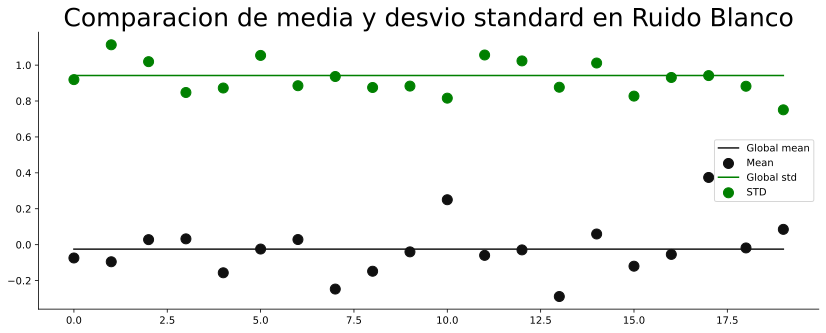

In [19]:
ruido_blanco_chunks = np.split(ruido_blanco, 20)
means, stds = [], []

for chunk in ruido_blanco_chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))

plt.title('Comparacion de media y desvio standard en Ruido Blanco', size=25)
plt.plot(np.arange(len(means)), [ruido_blanco.mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [ruido_blanco.std()] * len(stds), label='Global std', lw=1.5, color='green')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', s=100, color='green')
plt.legend();

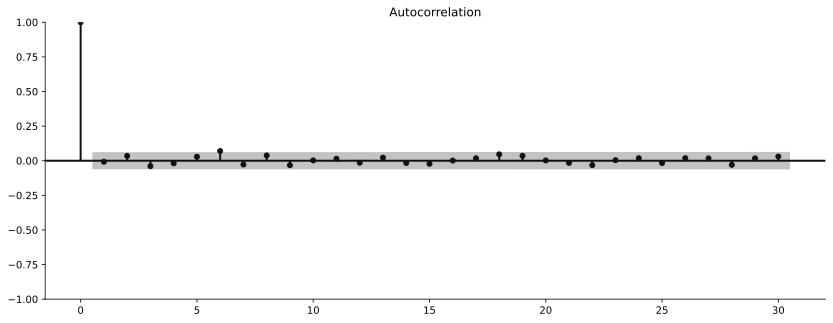

In [20]:
plot_acf(np.array(ruido_blanco));

Camino aleatorio

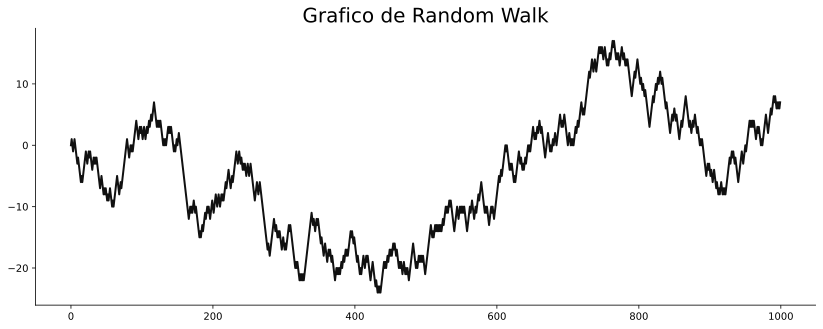

In [21]:
random_walk = [0]

for i in range(1,1000):
  num= -1 if np.random.random() < 0.5 else 1
  random_walk.append(random_walk[-1] + num)

plt.title('Grafico de Random Walk', size=20)
plt.plot(np.arange(len(random_walk)), random_walk);

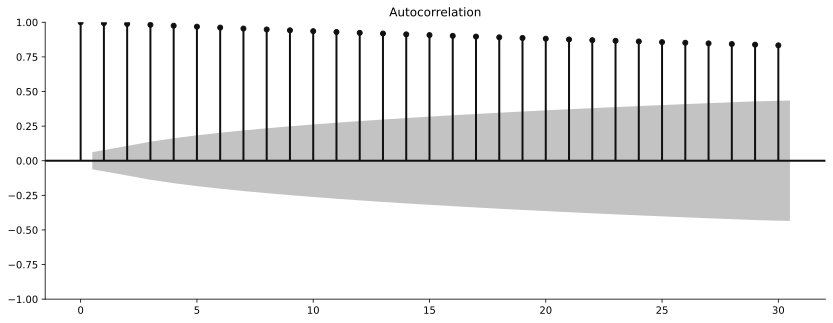

In [22]:
plot_acf(np.array(random_walk));

In [23]:
s_random_walk = pd.Series(random_walk)
s_random_walk_diff = s_random_walk.diff().dropna()

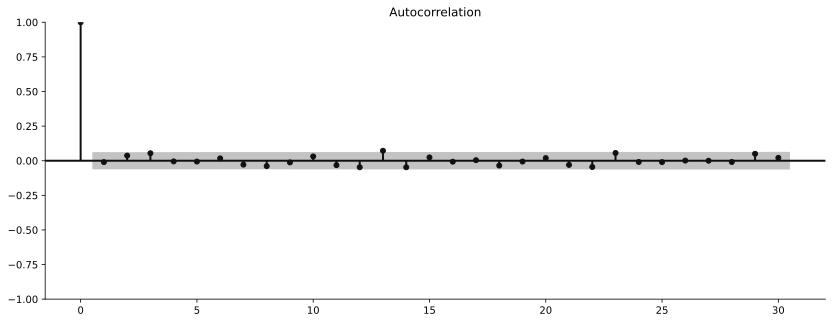

In [24]:
plot_acf(np.array(s_random_walk_diff));

Datos históricos del mercado

https://pypi.org/project/yfinance/

In [ ]:
  !pip install yfinance
  !pip install mplfinance

In [26]:
from datetime import datetime
import yfinance as yf
import mplfinance as mpf
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)
data = yf.download('MSFT', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [27]:
data2 = data["Open"]

<Axes: xlabel='Date'>

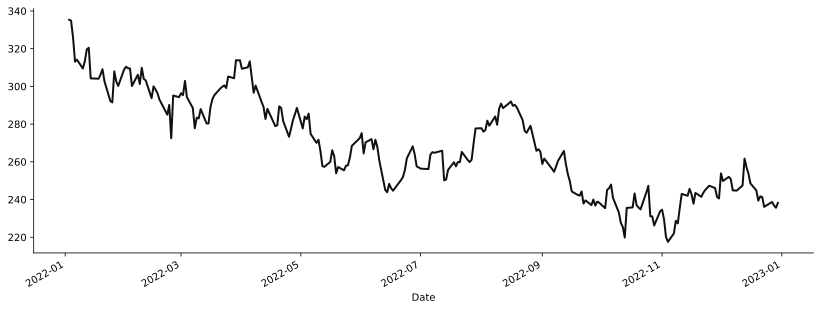

In [28]:
data2.plot()

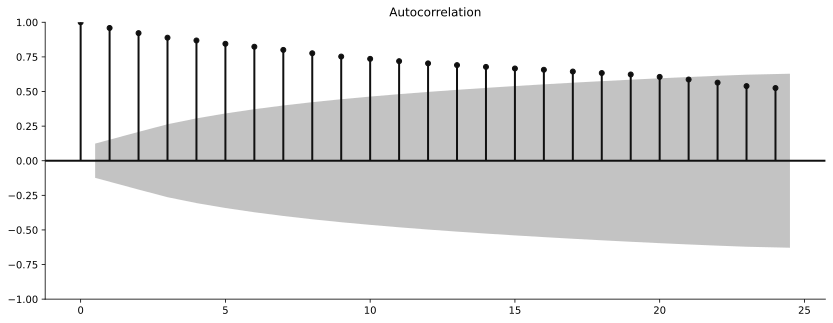

In [29]:
plot_acf(np.array(data2));

In [30]:
s_data2 = pd.Series(data2)
s_data2_diff = s_data2.diff().dropna()

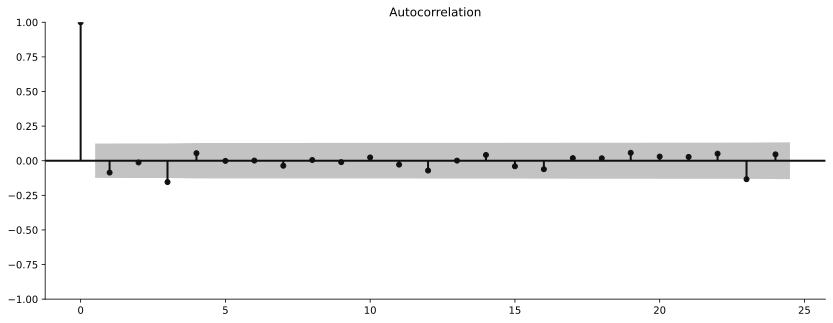

In [31]:
plot_acf(np.array(s_data2_diff));

<body>
  <h1> Fin ejercicio! </h1>
</body>